In [1]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#client = ServiceNowHTTPXClient()
#response = client.healthCheck() # always run to make sure the instance is awake

In [3]:
# grab our major incident data
"""response = client.getData('incident','major_incident_state=accepted', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'
    })"""

#data = response.json()['result']
#df = pd.DataFrame(data)
#df.head(5)

"response = client.getData('incident','major_incident_state=accepted', {\n    'sysparm_display_value':True,\n    'sysparm_exclude_reference_link':True,\n    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'\n    })"

In [4]:
rate = 20 # average number of events per year
size = 20
# stable, shift, breakdown

z = np.random.exponential(1./rate, size=size)*365
print(f'mean: {np.mean(z)}')
print(f'max: {np.max(z)}')
print(f'min: {np.min(z)}')
print(f'std: {np.std(z)}')
df = pd.Timestamp('today').normalize() - pd.to_timedelta(24*60*60*np.cumsum(z), unit='s')
df

mean: 15.470654885529783
max: 47.57444411929223
min: 0.33043207030202354
std: 14.608923178511489


DatetimeIndex(['2023-04-16 17:24:53.929161566',
               '2023-04-06 15:55:01.187673077',
               '2023-04-06 07:59:11.856798982',
               '2023-04-04 17:32:28.906012623',
               '2023-03-20 08:58:37.723574172',
               '2023-03-18 11:22:00.264739199',
               '2023-01-29 21:34:48.292832350',
               '2022-12-19 08:35:11.278195098',
               '2022-11-18 04:04:45.868198500',
               '2022-11-11 18:05:27.887114255',
               '2022-11-04 00:51:10.902171720',
               '2022-09-26 23:37:18.630293660',
               '2022-09-25 15:13:13.021785814',
               '2022-09-11 20:22:54.533542447',
               '2022-09-03 21:37:47.339628372',
               '2022-08-20 11:27:59.822520312',
               '2022-08-19 05:11:51.780796122',
               '2022-08-06 10:59:17.311432779',
               '2022-07-29 20:20:52.073291566',
               '2022-07-18 14:05:08.357804529'],
              dtype='datetime64[ns]', f

<Axes: >

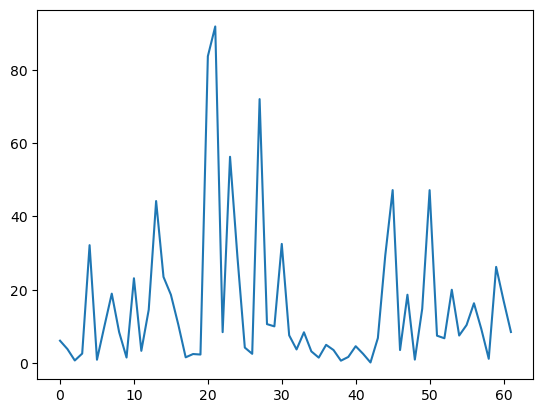

In [20]:
rates = [20,  5, 20, 80, 20]
sizes = [20,  2, 10, 10, 20]

from ServiceNowFaker import simulateArrivals
from datetime import datetime

arrivalDF = pd.DataFrame(simulateArrivals(rates, sizes))
arrivalDF = arrivalDF.rename(columns={0: "Opened"})
arrivalDF['Delta'] = -arrivalDF["Opened"].diff()
arrivalDF.loc[0,'Delta'] = datetime.today()-arrivalDF.iloc[0]['Opened'] # time difference from today

# reversing the data doesn't seem to change the chart.
display(((arrivalDF)['Delta'].astype('timedelta64[s]')/(24*60*60)).plot.line()) 

In [21]:
display(arrivalDF)

,Opened,Delta
0,2023-05-18 10:33:28.083159471,6 days 02:02:00.331163529
1,2023-05-14 15:06:43.231639263,3 days 19:26:44.851520208
2,2023-05-13 22:37:23.281590443,0 days 16:29:19.950048820
3,2023-05-11 08:57:53.184863427,2 days 13:39:30.096727016
4,2023-04-09 05:25:32.332620718,32 days 03:32:20.852242709
...,...,...
57,2020-11-17 09:21:06.977623835,9 days 05:25:22.249129012
58,2020-11-16 05:42:43.130922407,1 days 03:38:23.846701428
59,2020-10-21 00:27:03.692871273,26 days 05:15:39.438051134
60,2020-10-03 22:31:54.793957233,17 days 01:55:08.898914040


In [26]:
numbersLength = len(arrivalDF.index)
for index, row in arrivalDF.iterrows():
    print()
    break


INC0040063
